In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# CSV 읽기

In [2]:
df = pd.read_csv("winning_rate_KBO.csv")

In [3]:
df

,year,team,run_o,run_d,win,lose
0,1982,MBC,419,350,46,34
1,1982,삼성,429,257,54,26
2,1982,OB,399,318,56,24
3,1982,해태,374,388,38,42
4,1982,롯데,353,385,31,49
5,1982,삼미,302,574,15,65
6,1983,삼성,448,418,46,50
7,1983,해태,423,390,55,44
8,1983,MBC,405,335,55,43
9,1983,OB,418,432,44,55


# 승률 및 피타고리안 승률을 열에 추가

In [4]:
df["winning_rate"] = df["win"]/(df["win"]+df["lose"])
# 실제 승률. 승률 계산에서 무승부는 제외한다. 현재 KBO의 승률 계산법을 일괄적으로 적용
df["Pythagorean1"] = pow(df["run_o"], 2)/(pow(df["run_o"], 2) + pow(df["run_d"], 2))          # 피타고리안 승률 1
df["Pythagorean2"] = pow(df["run_o"], 1.83)/(pow(df["run_o"], 1.83) + pow(df["run_d"], 1.83)) # 피타고리안 승률 2

피타고리안 승률 계산은 두 가지
- 첫 번째는 통상적인 피타고리안 승률 계산법
- 두 번째는 베이스볼 레퍼런스에서 사용하는 지수(1.83)를 적용한 피타고리안 승률 계산법

In [5]:
df

,year,team,run_o,run_d,win,lose,winning_rate,Pythagorean1,Pythagorean2
0,1982,MBC,419,350,46,34,0.575000,0.589010,0.581586
1,1982,삼성,429,257,54,26,0.675000,0.735899,0.718626
2,1982,OB,399,318,56,24,0.700000,0.611547,0.602345
3,1982,해태,374,388,38,42,0.475000,0.481633,0.483193
4,1982,롯데,353,385,31,49,0.387500,0.456721,0.460384
5,1982,삼미,302,574,15,65,0.187500,0.216801,0.235911
6,1983,삼성,448,418,46,50,0.479167,0.534601,0.531668
7,1983,해태,423,390,55,44,0.555556,0.540524,0.537092
8,1983,MBC,405,335,55,43,0.561224,0.593756,0.585952
9,1983,OB,418,432,44,55,0.444444,0.483534,0.484933


# 데이터를 추가한 테이블을 CSV로 저장

In [6]:
df.to_csv("winning_rate_KBO2.csv")

# SEABORN을 이용해 그래프로 표현

scatter plot 뿐만 아니라 회귀분석 그래프와 피어슨 상관계수를 같이 나타냄

In [7]:
sns.set()

In [8]:
sns.set_style("whitegrid")

C:\Dev\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Dev\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


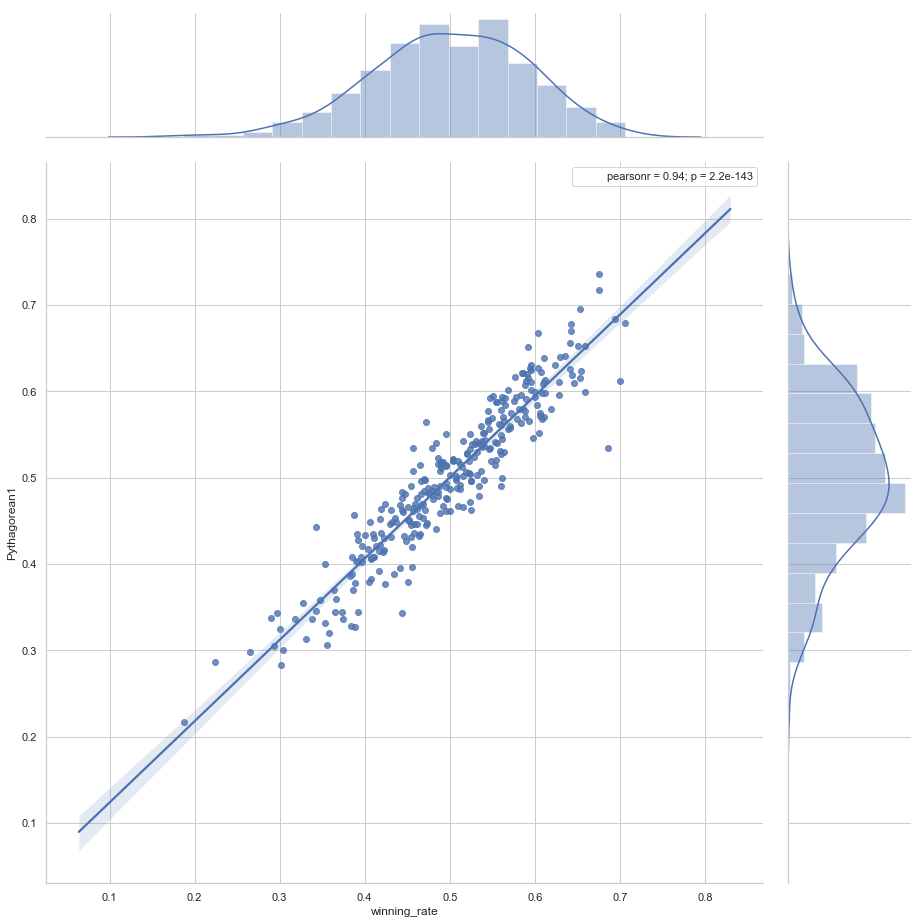

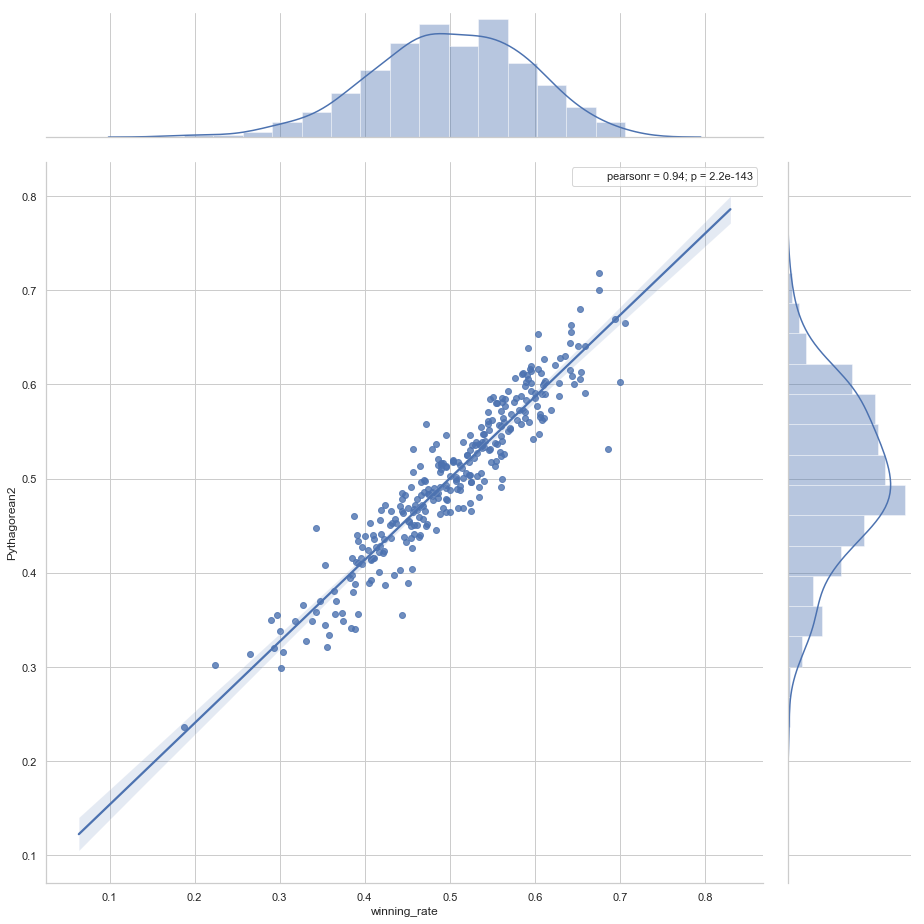

In [9]:
sns.jointplot(x="winning_rate", y="Pythagorean1", data=df, kind="reg", height=13, stat_func=stats.pearsonr)
sns.jointplot(x="winning_rate", y="Pythagorean2", data=df, kind="reg", height=13, stat_func=stats.pearsonr)

실제 승률과 피타고리안 승률은 피어슨 상관계수 0.94로 상당히 높은 상관관계를 가진다.